In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset MNIST
print("Carregando o dataset MNIST...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Carregando o dataset MNIST...


In [2]:
# Normalizando os dados (escalando para valores entre 0 e 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape dos dados para incluir o canal (necessário para CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convertendo labels para one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print("\nFormato dos dados:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Formato dos dados:
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [3]:
# Criando a arquitetura da Rede Neural
def criar_modelo():
    modelo = Sequential([
        # Primeira camada convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        
        # Segunda camada convolucional
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Terceira camada convolucional
        Conv2D(64, (3, 3), activation='relu'),
        
        # Camadas densas
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),  # Regularização
        Dense(10, activation='softmax')  # 10 classes (dígitos 0-9)
    ])
    
    return modelo

In [4]:
# Criando e compilando o modelo
modelo = criar_modelo()
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Exibindo o resumo da arquitetura
print("\nArquitetura da Rede Neural:")
modelo.summary()


Arquitetura da Rede Neural:


C:\Users\flavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Treinando o modelo
print("\nIniciando o treinamento...")
historico = modelo.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Avaliando o modelo
print("\nAvaliando o modelo...")
test_loss, test_acc = modelo.evaluate(X_test, y_test, verbose=2)
print(f"\nAcurácia no conjunto de teste: {test_acc:.4f}")


Iniciando o treinamento...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7457 - loss: 0.7814 - val_accuracy: 0.9772 - val_loss: 0.0792
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9602 - loss: 0.1374 - val_accuracy: 0.9810 - val_loss: 0.0653
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9739 - loss: 0.0904 - val_accuracy: 0.9849 - val_loss: 0.0503
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9812 - loss: 0.0675 - val_accuracy: 0.9891 - val_loss: 0.0420
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9857 - loss: 0.0482 - val_accuracy: 0.9883 - val_loss: 0.0428
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9852 - loss: 0.0480 - val_accuracy: 0.9883 - val_loss: 0.0437
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9890 - loss: 0.0370 - val_accuracy: 0.9850 - val_loss: 0.0581
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9899 - los

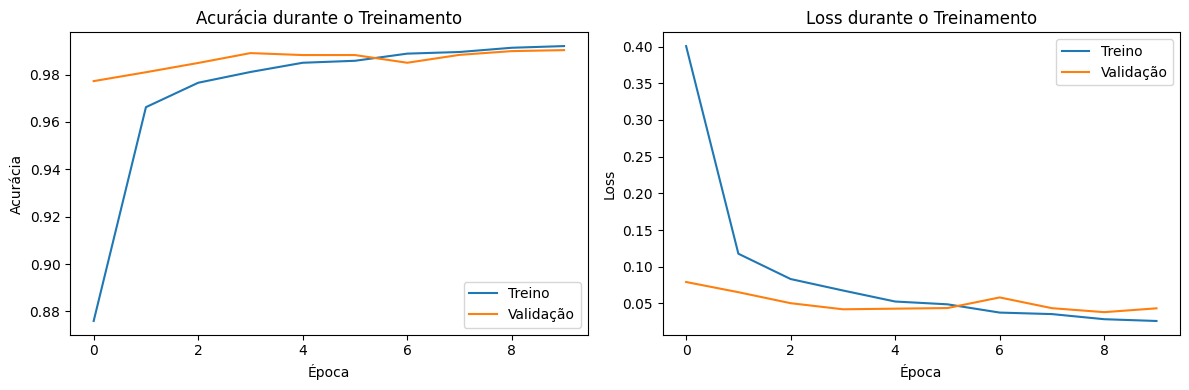

In [6]:
# Plotando a curva de aprendizado
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Treino')
plt.plot(historico.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'], label='Treino')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Loss durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Fazendo previsões em algumas imagens de teste
print("\nFazendo previsões em algumas imagens de teste...")
indices = np.random.randint(0, len(X_test), 5)
imagens_teste = X_test[indices]
labels_reais = np.argmax(y_test[indices], axis=1)

previsoes = modelo.predict(imagens_teste)
labels_previstos = np.argmax(previsoes, axis=1)


Fazendo previsões em algumas imagens de teste...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


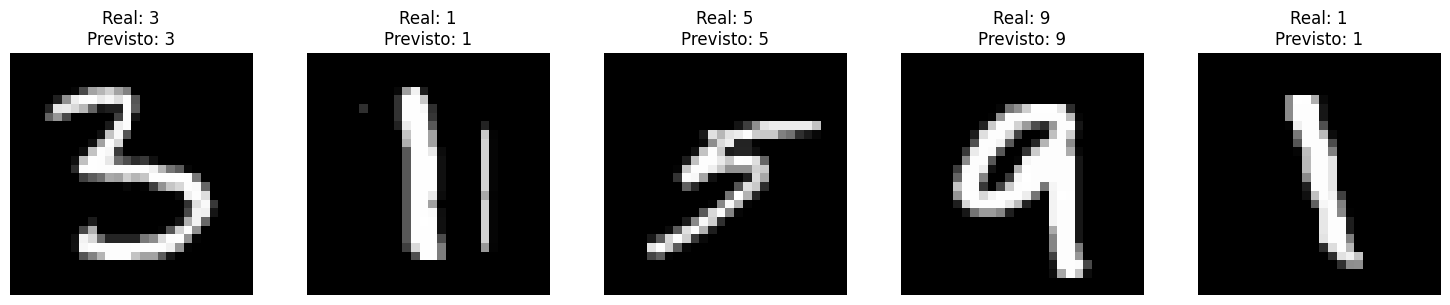

In [8]:
# Visualizando as previsões
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(imagens_teste[i].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {labels_reais[i]}\nPrevisto: {labels_previstos[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


Gerando matriz de confusão...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


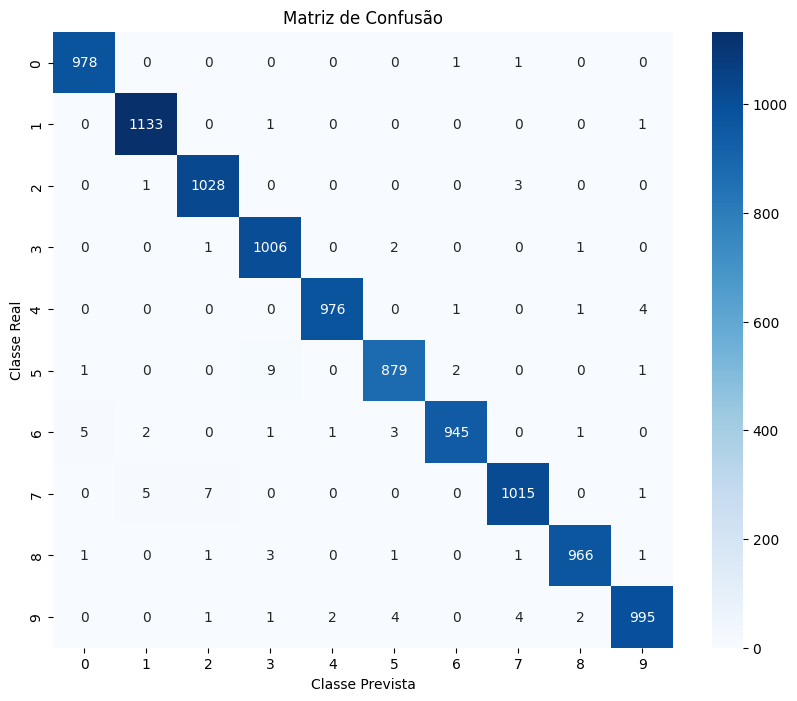

In [9]:
# Matriz de confusão
print("\nGerando matriz de confusão...")
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

In [10]:
# Salvando o modelo
print("\nSalvando o modelo...")
modelo.save('modelo_mnist.h5')
print("Modelo salvo como 'modelo_mnist.h5'")


Salvando o modelo...
Modelo salvo como 'modelo_mnist.h5'


In [11]:
# Exemplo de como usar o modelo para fazer previsões em novas imagens
def prever_digito(imagem):
    # Normalizando a imagem
    imagem = imagem.astype('float32') / 255.0
    # Reshape para o formato esperado pelo modelo
    imagem = imagem.reshape(1, 28, 28, 1)
    # Fazendo a previsão
    previsao = modelo.predict(imagem)
    return np.argmax(previsao)

In [12]:
print("\nExemplo de uso do modelo para prever um dígito:")
# Pegando uma imagem aleatória do conjunto de teste
imagem_exemplo = X_test[0]
digito_previsto = prever_digito(imagem_exemplo)
print(f"Dígito previsto: {digito_previsto}")


Exemplo de uso do modelo para prever um dígito:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dígito previsto: 8


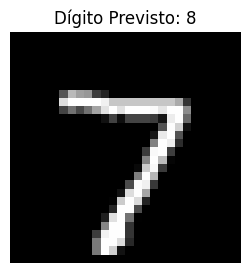

In [13]:
# Visualizando a imagem de exemplo
plt.figure(figsize=(3, 3))
plt.imshow(imagem_exemplo.reshape(28, 28), cmap='gray')
plt.title(f'Dígito Previsto: {digito_previsto}')
plt.axis('off')
plt.show()